In [1]:
import requests

In [2]:
res = requests.post(
    # "https://api.dev.mediaimpactmonitor.app/events",
    "http://localhost:8000/events",
    json={
        "event_type": "protest",
        "source": "acled",
        "topic": "climate_change",
        "start_date": "2023-07-01",
        "end_date": "2023-12-31",
        "organizers": ["Last Generation (Germany)"],
    },
)
events = res.json()["data"]
event_ids = [event["event_id"] for event in events]
events[0]

{'event_id': '9064cc0660a50363ec2d44a8fe51b376',
 'event_type': 'protest',
 'source': 'acled',
 'date': '2023-12-15',
 'organizers': ['Last Generation (Germany)'],
 'description': 'On 15 December 2023, about 15 Last Generation activists blocked streets at various places across Koln (Nordrhein-Westfalen), demanding immediate climate change. Law enforcers quickly removed them and resumed traffic.'}

In [3]:
res = requests.post(
    # "https://api.dev.mediaimpactmonitor.app/impact",
    "http://localhost:8000/impact",
    json={
        "cause": event_ids,
        "effect": {
            "trend_type": "keywords",
            "media_source": "news_online",
            "topic": "climate_change",
            "query": '"Letzte Generation"',
        },
        "method": "interrupted_time_series",
    },
)
data = res.json()["data"]

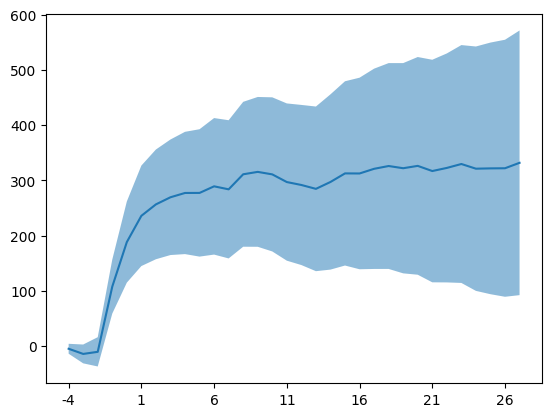

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

pd.Series(data["impact_average"]).plot()
plt.fill_between(
    pd.Series(data["impact_average"]).index,
    pd.Series(data["impact_average_lower"]).values,
    pd.Series(data["impact_average_upper"]).values,
    alpha=0.5,
)

count     151.000000
mean      296.960599
std       986.697558
min     -2133.562851
25%      -370.196449
50%       241.558525
75%      1440.875370
max      2044.068390
dtype: float64


<Axes: >

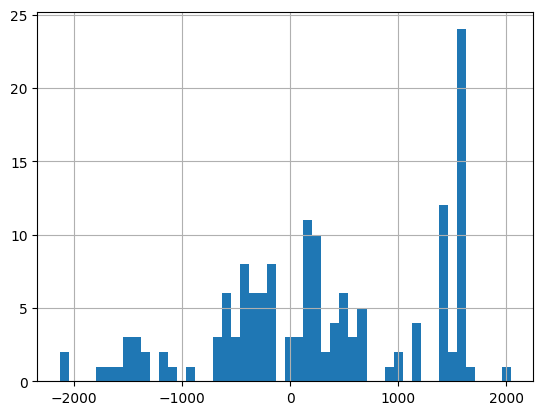

In [6]:
impacts__ = pd.Series(
    [list(ts.values())[4 + 14] for ts in data["individual_impacts"].values()]
)
print(impacts__.describe())
impacts__.hist(bins=50)

In [7]:
from scipy.stats import normaltest

normaltest(impacts__)

NormaltestResult(statistic=6.673493808306942, pvalue=0.03555242525322097)

Small p-value means that it's likely not normal. (However, large p-value does not mean anything, e. g. it can be due to small sample size.)
See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html.